In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/life-expectancy-trends-for-males-and-females/life_expectancy.csv


In [2]:
df = pd.read_csv("/kaggle/input/life-expectancy-trends-for-males-and-females/life_expectancy.csv")

In [3]:
df

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000
...,...,...,...,...,...,...,...,...
16998,18403,Zimbabwe,ZWE,2017,63.000000,58.200000,1.475110e+07,-4.80000
16999,18404,Zimbabwe,ZWE,2018,63.600000,59.000000,1.505219e+07,-4.60000
17000,18405,Zimbabwe,ZWE,2019,63.700000,58.600000,1.535461e+07,-5.10000
17001,18406,Zimbabwe,ZWE,2020,63.900000,58.100000,1.566966e+07,-5.80000


In [4]:
df = df.drop('Unnamed: 0', axis=1)

Check information and statistics of the dataset

Then perform some EDA

In [5]:
df.dtypes

Country                    object
Country Code               object
Year                        int64
Female Life Expectancy    float64
Male Life Expectancy      float64
Population                float64
Life Expectancy Gap       float64
dtype: object

In [6]:
print(df.shape)
df.describe()

(17003, 7)


,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


From a quick glance we see that the mean female life expectancy is about 5 years more than the mean male life expectancy.

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Country                   0
Country Code              0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

There are no duplicates or missing values so we don't need to do any cleaning from that side.

In [9]:
#count number of countries in the data
df['Country'].nunique()

247

<Axes: >

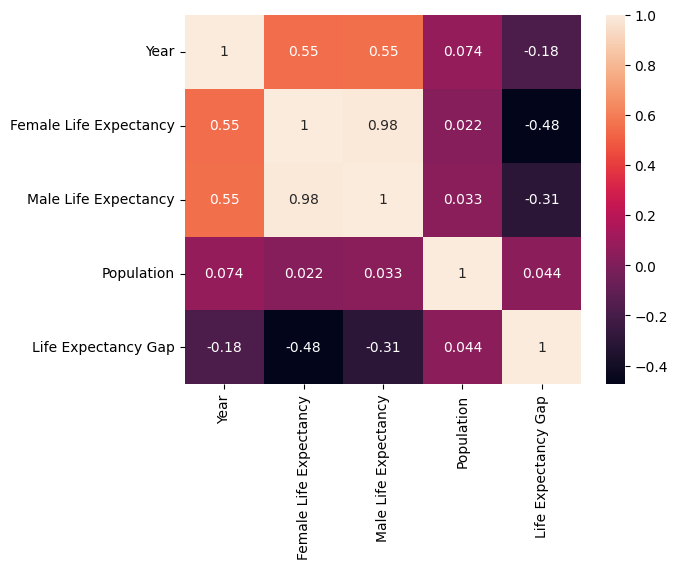

In [10]:
sns.heatmap(df[['Year','Female Life Expectancy', 'Male Life Expectancy', 'Population', 'Life Expectancy Gap']].corr(), annot=True)

In [11]:
#take average by year for male and female columns, then do line graph

fem_life_expec = df.groupby('Year')['Female Life Expectancy'].mean()

male_life_expec = df.groupby('Year')['Male Life Expectancy'].mean()

In [12]:
ticks = int(max(df['Year'])) - int(min(df['Year']))

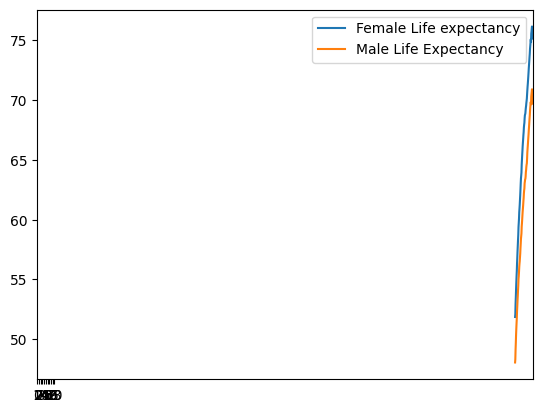

In [13]:
plt.plot(fem_life_expec.index, fem_life_expec.values,label = "Female Life expectancy")
plt.plot(male_life_expec.index, male_life_expec.values, label = "Male Life Expectancy") 
plt.xticks(np.arange(0, ticks, 7))
plt.legend() 
plt.show()

In [14]:
#plot on a map

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [15]:
#Plotting a bubble map using plotly express

df_sorted = df.sort_values('Year')

fig = px.choropleth(df_sorted,
                    locations = 'Country',
                    locationmode = 'country names', 
                    color = 'Life Expectancy Gap',
                    color_continuous_scale = 'sunset',
                    hover_name = 'Country',
                    animation_frame = 'Year')


fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 50
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [16]:
df2 = df.drop(df[df.Year >= 2020].index)

In [17]:
df2

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000
...,...,...,...,...,...,...,...
16996,Zimbabwe,ZWE,2015,61.600000,57.300000,1.415494e+07,-4.30000
16997,Zimbabwe,ZWE,2016,62.400000,58.000000,1.445270e+07,-4.40000
16998,Zimbabwe,ZWE,2017,63.000000,58.200000,1.475110e+07,-4.80000
16999,Zimbabwe,ZWE,2018,63.600000,59.000000,1.505219e+07,-4.60000


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [19]:
# split data into train-test set
train = df[df['Year'] < 2010]
test = df[df['Year']>= 2010]

# check shape
train.shape, test.shape

((14160, 7), (2843, 7))

In [20]:
X_train, X_test = train['Year'], test['Year']

In [21]:
y_train, y_test = train['Female Life Expectancy'], test['Female Life Expectancy']

In [22]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score: ", r2_score(y_test,y_pred))

Mean Squared Error: 69.99425733060804
R2 Score:  -0.05599426602283786
